# Import required libraries

In [ ]:
import h5py
import numpy as np
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from sklearn.metrics import roc_curve, auc

**Mounted to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# To get the images and labels from file
with h5py.File('/content/drive/MyDrive/Galaxy10_DECals.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)

# To convert to desirable type
labels = labels.astype(np.float32)
images = images.astype(np.float32)

# Split Dataset

In [ ]:
train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = images[train_idx], labels[train_idx], images[test_idx], labels[test_idx]

In [ ]:
train_images.shape

(15962, 256, 256, 3)

## Map index to galaxies name

In [ ]:
def galaxyMap(index):
  arr = {
      0: "Disturbed Galaxies",
      1: "Merging Galaxies",
      2: "Round Smooth Galaxies",
      3: "In-between Round Smooth Galaxies",
      4: "Cigar Shaped Smooth Galaxies",
      5: "Barred Spiral Galaxies",
      6: "Unbarred Tight Spiral Galaxies",
      7: "Unbarred Loose Spiral Galaxies",
      8: "Edge-on Galaxies without Bulge",
      9: "Edge-on Galaxies with Bulge"
  }
  return arr[index]

## Display images from the dataset randomly

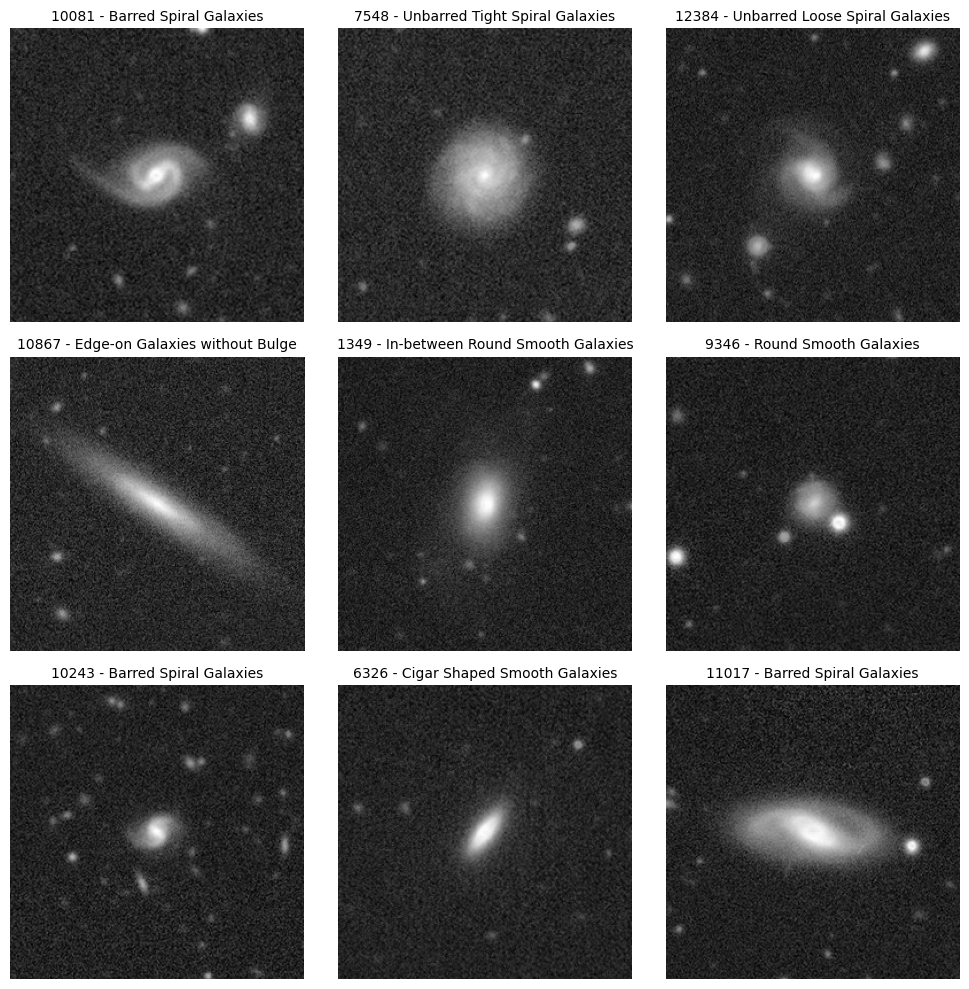

In [ ]:
# 随机选择9个图像的索引
num_images_to_display = 9
random_indices = np.random.randint(0, len(train_images), num_images_to_display)

# 创建一个3x3的子图
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# 遍历随机选择的索引并绘制图像
for i, ax in enumerate(axes.flat):
    index = random_indices[i]
    image = train_images[index]

    # 合并g、r和z波段，你可以根据你的数据集的具体情况进行调整
    # 这里的例子是将三个波段平均值合并成RGB图像
    rgb_image = np.mean(image, axis=2)  # 将三个波段的平均值合并

    ax.imshow(rgb_image, cmap='gray')  # 使用灰度图像显示

    index_classification = np.argmax(train_labels[index])

    ax.set_title(f"{ index } - { galaxyMap(index_classification) }", fontsize = 10)
    ax.axis('off')

plt.tight_layout()
plt.show()


## Model Structure

In [ ]:
# Your code here
from tensorflow.keras.regularizers import l1, l2, l1_l2

model = Sequential()
#Convolutional
model.add(tf.keras.layers.Conv2D(32,(2,2),activation = 'relu',input_shape = (256,256,3),))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(tf.keras.layers.MaxPooling2D((2,2)))


model.add(tf.keras.layers.Conv2D(32,(2,2),activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(tf.keras.layers.AveragePooling2D((2, 2)))


model.add(tf.keras.layers.Conv2D(32,(2,2),activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(tf.keras.layers.MaxPooling2D((2,2)))


model.add(tf.keras.layers.Conv2D(32,(2,2),activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(tf.keras.layers.AveragePooling2D((2,2)))


model.add(tf.keras.layers.Conv2D(32,(2,2),activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(tf.keras.layers.AveragePooling2D((2,2)))


# model.add(tf.keras.layers.Conv2D(16,(2,2),activation = 'relu'))
# model.add(tf.keras.layers.BatchNormalization(synchronized=True))
# model.add(tf.keras.layers.AveragePooling2D((2,2)))


#Flatten
model.add(tf.keras.layers.Flatten())
#model connected
model.add(tf.keras.layers.Dense(128,activation = 'sigmoid', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(tf.keras.layers.Dense(64,activation = 'sigmoid', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(tf.keras.layers.Dense(32,activation = 'sigmoid', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
model.add(tf.keras.layers.Dropout(0.5))
#output
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

model.compile(optimizer = 'Nadam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 32)      416       
                                                                 
 batch_normalization (BatchN  (None, 255, 255, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      4128      
                                                                 
 batch_normalization_1 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                        

## Fitting Model

In [ ]:
history = model.fit(train_images, train_labels ,validation_split=0.2, epochs = 30, batch_size=8)

NameError: ignored

## Showing plt about model fitting.

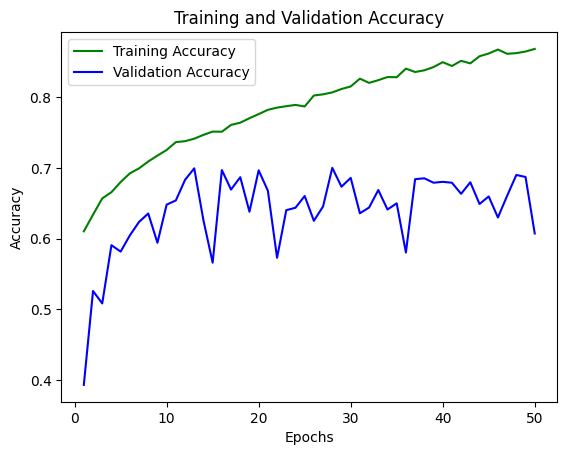

In [ ]:
# 提取训练和验证准确度数据
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# 绘制训练和验证准确度曲线
plt.plot(epochs, train_accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluate model accuracy of test set

In [ ]:
# 使用测试数据集评估模型
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# 打印测试结果
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

56/56 [==============================] - 1s 14ms/step - loss: 2.1276 - accuracy: 0.6026
Test Loss: 2.1276254653930664
Test Accuracy: 0.6025930047035217


## Get classification report

In [ ]:
from sklearn.metrics import classification_report

# 获取真实标签和预测标签
y_true = test_labels  # 真实标签
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)  # 获取预测类别
y_true_classes =  np.argmax(y_true, axis=1)

print(y_true_classes)
print(y_pred_classes)
# 计算分类报告
report = classification_report(y_true_classes, y_pred_classes)

print("Classification Report:")
print(report)


56/56 [==============================] - 1s 10ms/step
[9 7 3 ... 8 9 8]
[9 7 1 ... 8 9 9]
Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.22      0.21       115
           1       0.42      0.76      0.55       198
           2       0.77      0.85      0.81       257
           3       0.89      0.25      0.39       198
           4       0.92      0.28      0.43        39
           5       0.66      0.64      0.65       218
           6       0.59      0.52      0.55       173
           7       0.50      0.62      0.55       260
           8       0.83      0.66      0.74       130
           9       0.86      0.75      0.80       186

    accuracy                           0.60      1774
   macro avg       0.67      0.55      0.57      1774
weighted avg       0.66      0.60      0.60      1774



## Generate ROC curve

56/56 [==============================] - 1s 10ms/step


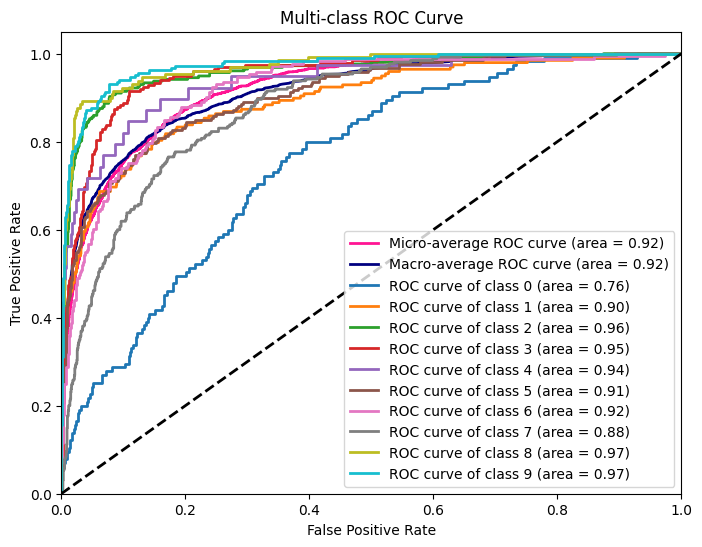

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 获取真实标签和预测标签
y_true = test_labels
y_pred = model.predict(test_images)

# 计算 ROC 曲线
n_classes = 10  # 类别数
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 计算 micro 平均的 ROC 曲线和 AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# 计算 macro 平均的 ROC 曲线和 AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# 绘制 micro 平均 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle='-', linewidth=2, label='Micro-average ROC curve (area = {0:0.2f})'
       ''.format(roc_auc["micro"]))

# 绘制 macro 平均 ROC 曲线
plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='-', linewidth=2, label='Macro-average ROC curve (area = {0:0.2f})'
       ''.format(roc_auc["macro"]))

# 绘制每个类别的 ROC 曲线
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Generate confusion

56/56 [==============================] - 1s 10ms/step


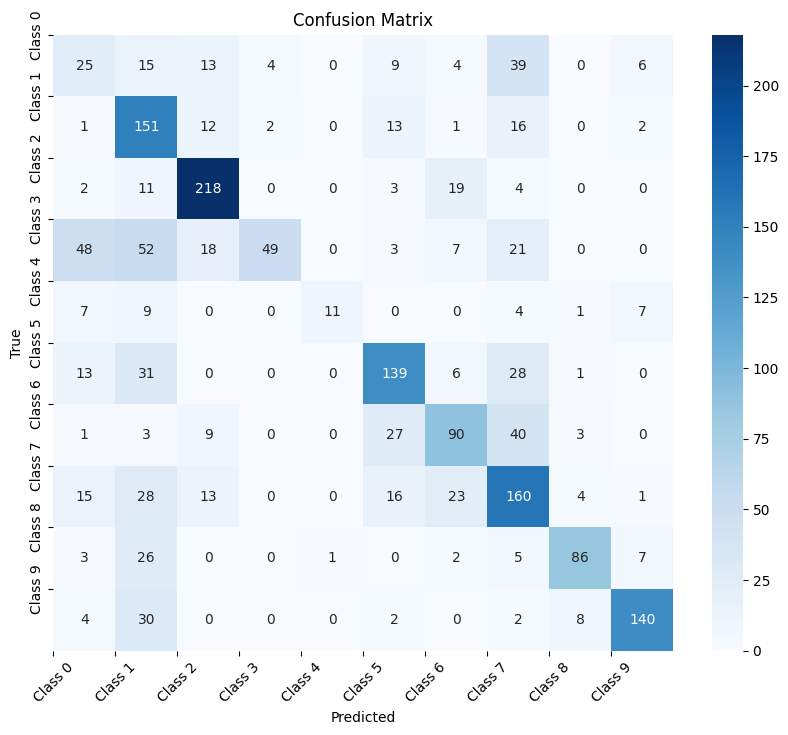

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 获取真实标签和预测标签
y_true = test_labels
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# 计算混淆矩阵
confusion_mtx = confusion_matrix(np.argmax(y_true, axis=1), y_pred_classes)

# 绘制热图
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)

# 设置坐标轴标签
plt.xlabel('Predicted')
plt.ylabel('True')

# 添加类别标签
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# 显示混淆矩阵
plt.title('Confusion Matrix')
plt.show()